# The ``rm_type`` Argument

By default, the JAVELIN module will ssume that the input light curves are spectroscopic light curves, and perform spectrooscopic reverberation mapping (RM) analysis. However, pyPetal can also analyze light curves using photometric RM analysis.

This can be changed with the ``rm_type`` argument, which can be either "spec" or "phot". 

.. warning:: JAVELIN's photometric RM analysis can only be done with two light curves, so ``together`` must be set to ``False`` if ``rm_type=phot``.

We can run the JAVELIN module assuming photometric light curves:


Running JAVELIN
--------------------
rm_type: phot
lagtobaseline: 0.3
laglimit: [[-1976.98849, 1976.98849], [-1976.98849, 1976.98849]]
fixed: True
p_fix: True
subtract_mean: True
nwalker: 100
nburn: 100
nchain: 100
output_chains: True
output_burn: True
output_logp: True
nbin: 50
metric: med
together: False
--------------------
        
start burn-in
nburn: 100 nwalkers: 100 --> number of burn-in iterations: 10000
burn-in finished
save burn-in chains to /home/stone28/pypetal/javelin_output4/H-alpha/javelin/burn_cont.txt
start sampling
sampling finished
acceptance fractions for all walkers are
0.66 0.62 0.68 0.72 0.68 0.68 0.80 0.69 0.75 0.72 0.68 0.62 0.78 0.78 0.61 0.72 0.61 0.74 0.75 0.76 0.70 0.67 0.70 0.75 0.66 0.74 0.79 0.67 0.69 0.75 0.72 0.73 0.70 0.73 0.74 0.70 0.67 0.64 0.71 0.74 0.69 0.66 0.71 0.70 0.65 0.60 0.71 0.76 0.68 0.69 0.69 0.67 0.71 0.67 0.78 0.55 0.64 0.62 0.70 0.64 0.72 0.72 0.67 0.76 0.75 0.68 0.70 0.64 0.75 0.80 0.74 0.62 0.70 0.73 0.73 0.78 0.73 0.66 0.61 0.76 

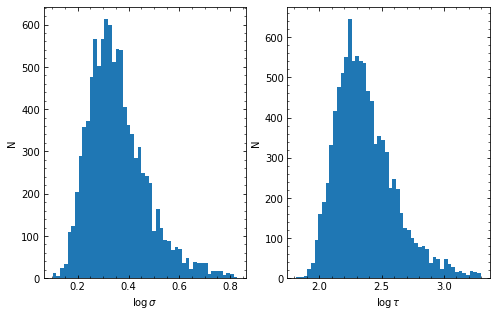

run parallel chains of number 40 
start burn-in
using priors on sigma and tau from continuum fitting
[[  1.776 140.397]
 [  2.18  214.958]
 [  2.92  392.48 ]]
penalize lags longer than 0.30 of the baseline
nburn: 100 nwalkers: 100 --> number of burn-in iterations: 10000
burn-in finished
save burn-in chains to /home/stone28/pypetal/javelin_output4/H-alpha/javelin/burn_rmap.txt
start sampling
sampling finished
acceptance fractions are
0.06 0.06 0.04 0.05 0.06 0.01 0.03 0.13 0.04 0.09 0.06 0.03 0.06 0.05 0.05 0.05 0.02 0.04 0.13 0.06 0.10 0.02 0.08 0.02 0.03 0.07 0.09 0.12 0.12 0.14 0.07 0.07 0.04 0.05 0.13 0.06 0.13 0.08 0.13 0.01 0.07 0.02 0.03 0.01 0.03 0.09 0.03 0.05 0.08 0.08 0.03 0.05 0.06 0.04 0.04 0.10 0.03 0.01 0.07 0.02 0.05 0.05 0.14 0.07 0.05 0.03 0.02 0.06 0.01 0.07 0.09 0.07 0.10 0.08 0.09 0.10 0.07 0.08 0.02 0.03 0.13 0.06 0.16 0.14 0.00 0.07 0.02 0.02 0.08 0.03 0.05 0.10 0.08 0.00 0.04 0.02 0.08 0.06 0.11 0.08
save MCMC chains to /home/stone28/pypetal/javelin_output4/H-alp

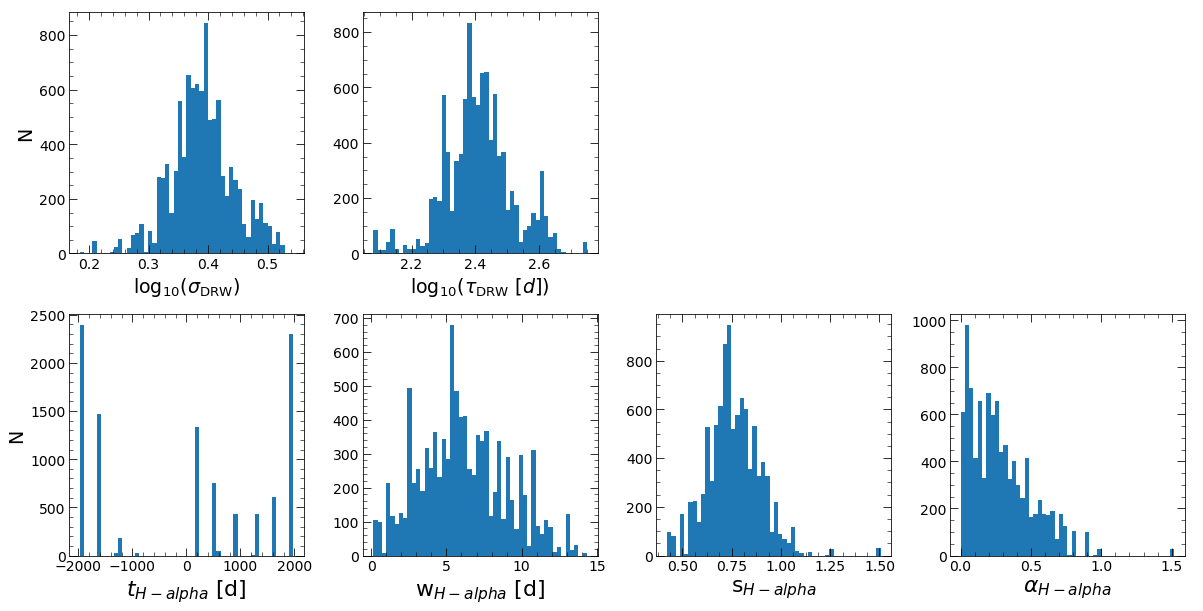

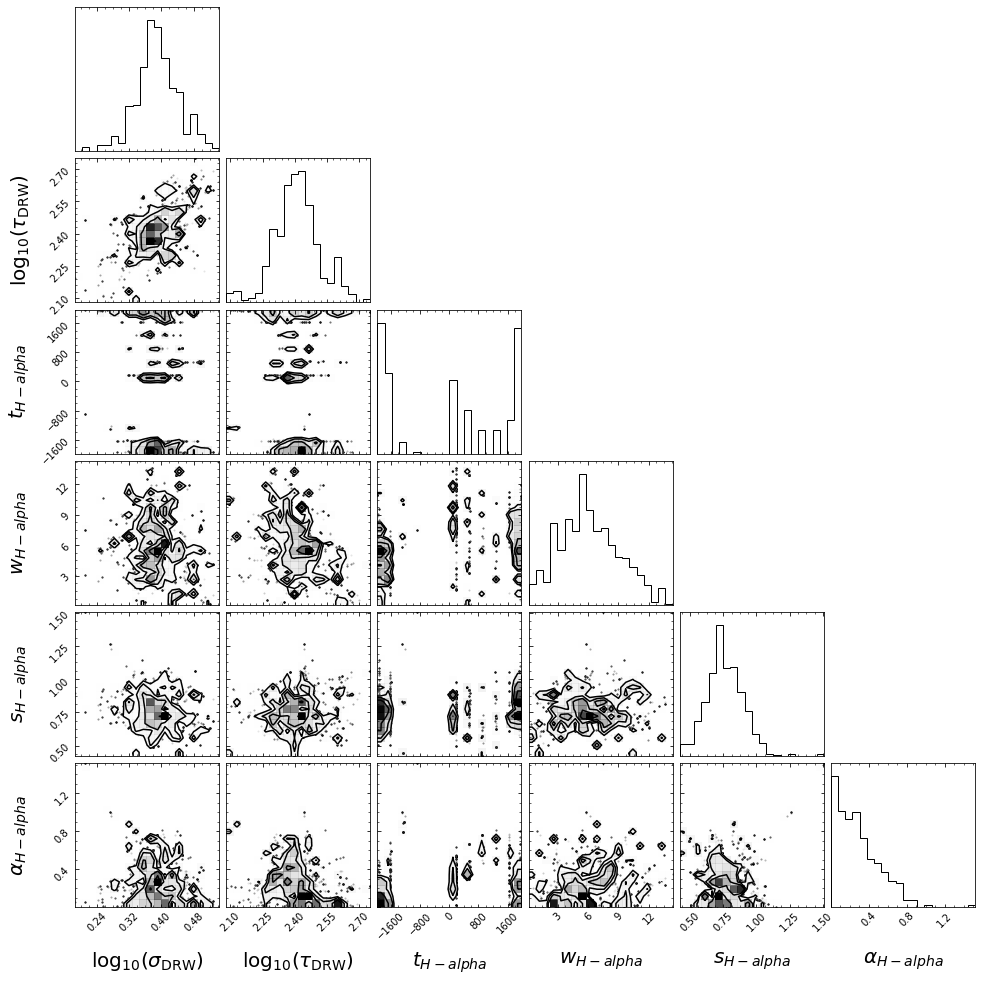

covariance matrix calculated
covariance matrix decomposed and updated by U


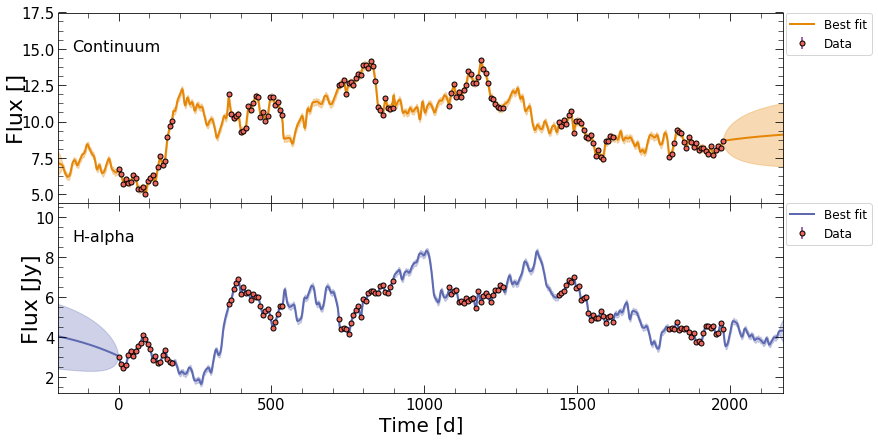

start burn-in
nburn: 100 nwalkers: 100 --> number of burn-in iterations: 10000
burn-in finished
save burn-in chains to /home/stone28/pypetal/javelin_output4/H-beta/javelin/burn_cont.txt
start sampling
sampling finished
acceptance fractions for all walkers are
0.67 0.70 0.77 0.67 0.60 0.73 0.73 0.70 0.67 0.64 0.69 0.64 0.76 0.71 0.66 0.68 0.85 0.80 0.72 0.65 0.72 0.64 0.63 0.71 0.72 0.65 0.64 0.77 0.77 0.69 0.63 0.70 0.76 0.81 0.74 0.87 0.64 0.72 0.72 0.63 0.77 0.71 0.78 0.67 0.66 0.75 0.80 0.71 0.75 0.78 0.74 0.72 0.72 0.77 0.79 0.77 0.79 0.77 0.67 0.67 0.78 0.70 0.70 0.82 0.69 0.68 0.77 0.69 0.73 0.72 0.65 0.66 0.75 0.71 0.70 0.68 0.69 0.62 0.63 0.69 0.72 0.76 0.69 0.66 0.68 0.73 0.69 0.73 0.78 0.57 0.80 0.63 0.73 0.59 0.72 0.76 0.71 0.66 0.73 0.65
save MCMC chains to /home/stone28/pypetal/javelin_output4/H-beta/javelin/chain_cont.txt
save logp of MCMC chains to /home/stone28/pypetal/javelin_output4/H-beta/javelin/logp_cont.txt
HPD of sigma
low:    1.753 med    2.145 hig    2.806
HPD 

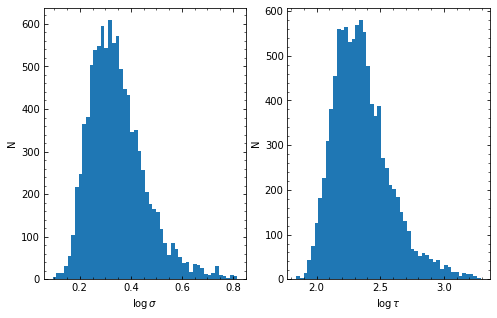

run parallel chains of number 40 
start burn-in
using priors on sigma and tau from continuum fitting
[[  1.753 140.488]
 [  2.145 211.81 ]
 [  2.806 366.568]]
penalize lags longer than 0.30 of the baseline
nburn: 100 nwalkers: 100 --> number of burn-in iterations: 10000
burn-in finished
save burn-in chains to /home/stone28/pypetal/javelin_output4/H-beta/javelin/burn_rmap.txt
start sampling
sampling finished
acceptance fractions are
0.06 0.05 0.04 0.06 0.09 0.09 0.10 0.08 0.01 0.08 0.13 0.12 0.16 0.05 0.10 0.05 0.05 0.15 0.02 0.11 0.03 0.11 0.05 0.12 0.20 0.03 0.12 0.08 0.08 0.01 0.04 0.06 0.07 0.04 0.06 0.00 0.00 0.06 0.09 0.10 0.11 0.11 0.14 0.08 0.14 0.10 0.06 0.03 0.15 0.12 0.05 0.07 0.08 0.01 0.05 0.02 0.09 0.03 0.11 0.08 0.13 0.04 0.07 0.08 0.06 0.12 0.05 0.14 0.17 0.02 0.12 0.13 0.07 0.09 0.11 0.10 0.10 0.05 0.05 0.01 0.06 0.12 0.10 0.07 0.14 0.11 0.06 0.10 0.05 0.05 0.06 0.00 0.01 0.16 0.06 0.09 0.08 0.07 0.02 0.00
save MCMC chains to /home/stone28/pypetal/javelin_output4/H-beta

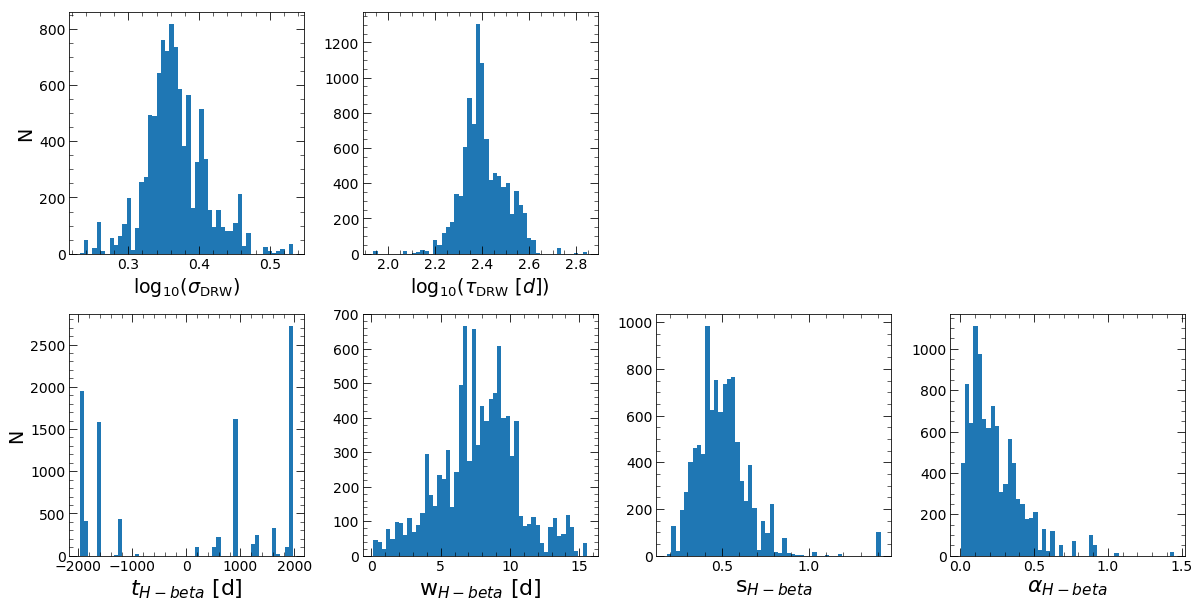

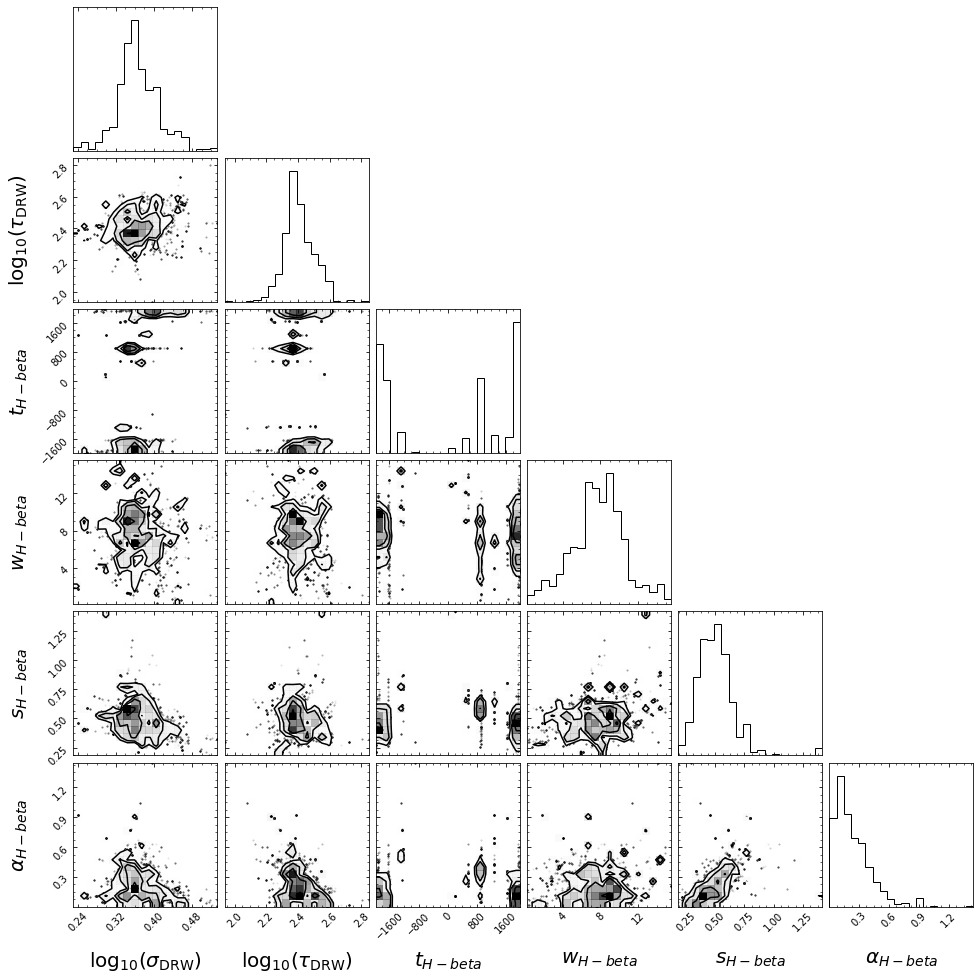

covariance matrix calculated
covariance matrix decomposed and updated by U


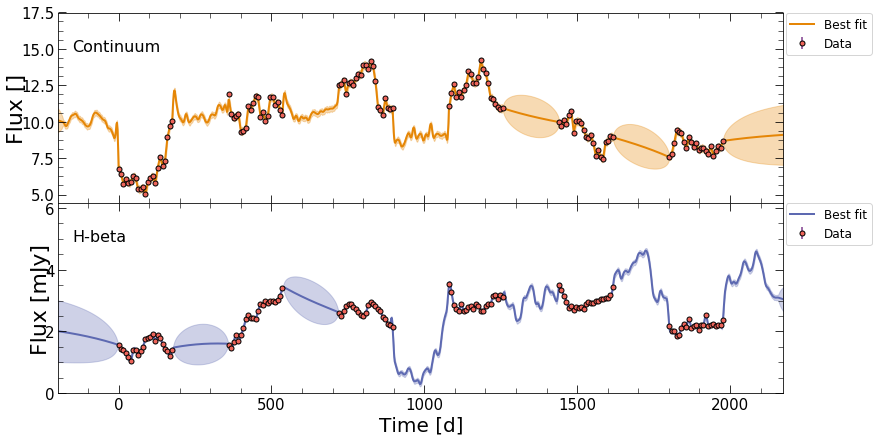

In [1]:
%matplotlib inline
import pypetal_jav.pipeline as pl

output_dir = 'javelin_output4/'
line_names = ['Continuum', 'H-alpha', 'H-beta']

params = {
    'rm_type': "phot",
    'together': False
}

res = pl.run_pipeline( output_dir, line_names,
                 javelin_params=params,
                 verbose=True,
                 plot=True,
                 file_fmt='ascii',
                 lc_unit=['', 'Jy', 'mJy'],
                 time_unit='d',
                 threads=40)

There are two main differences in the output dictionary (and data) for this case:

* ``rmap_model`` will return a ``javelin.lcmodel.Pmap_Model`` object instead of a ``javelin.lcmodel.Rmap_Model object``.
* There are 4 tophat parameters (t, w, s, $\alpha$) for each line instead of 3.

All other output data and files are the same as in the basic case.